# importing_libraries

In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
from scipy import stats

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [3]:
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

# importing_data

In [4]:
df=pd.read_csv("ahs-mort-odisha-sundargarh.csv")

In [5]:
df1=df[["rural","stratum_code","deceased_sex",
    "age_of_death_above_one_year","treatment_source","place_of_death","month_of_death","year_of_death","member_identity",
    "social_group_code","marital_status","year_of_marriage","highest_qualification","occupation_status","disability_status",
    "chew","smoke","alcohol","house_structure","drinking_water_source","household_have_electricity","lighting_source",
    "cooking_fuel","no_of_dwelling_rooms"]]

In [6]:
df1["year_of_death"].unique()

array([2011, 2009, 2008, 2007], dtype=int64)

In [7]:
#df1.to_csv("anual_health_survey.csv")
df1.head(2)

,rural,stratum_code,deceased_sex,age_of_death_above_one_year,treatment_source,place_of_death,month_of_death,year_of_death,member_identity,social_group_code,...,disability_status,chew,smoke,alcohol,house_structure,drinking_water_source,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms
0,Rural,200<population<2000,Male,51.0,Government PHC,In health facility,0,2011,238.0,Others,...,No Disability,Never chewed,Never smoked,Never drank,Pucca,Hand pump,Yes,Kerosene,Firewood,4.0
1,Rural,200<population<2000,Female,67.0,No Medical attention,At home,0,2011,1.0,ST,...,No Disability,Never chewed,Never smoked,Never drank,Kuccha,Hand pump,No,Kerosene,Firewood,2.0


# data pre_processing

In [8]:
def cat(cl):
    c=pd.get_dummies(df1[cl]).columns
    n=(len(df1[cl].values))
    ar=np.zeros(n)
    for i in np.arange(len(c)):
        for j in np.arange(n):
            if c[i]==df1[cl][j]:
                ar[j]=i
    return(ar)

In [9]:
def replacer_mean(dff):
    dff1=dff
    r0=np.mean(dff)
    r1=r0.index
    r2=r0.values
    for i in np.arange(len(r1)):
          ri=r1[i]
          rv=r2[i]
          dff1[ri].fillna(value=rv)
          dff1[ri]=(nan_remover(dff[ri].values,rv))
    return(dff1)
def nan_remover(v,vm):
    vr=[]
    for i in np.arange(len(v)):
        if str(v[i])=="nan":
            vr=np.append(vr,vm)
        else:
            vr=np.append(vr,v[i])
    return(vr)
def numriser(a):
    a1=[]
    for i in np.arange(len(a)):
        a1=np.append(a1,round(a[i]))
    return(a1)

def substi(ar,s):
    n=len(ar)
    sum1=0
    for i in np.arange(n):
        j=ar[i]
        df_c1["interval"][j]=s
        #sum1=sum1+ar[i]
    return(df_c1)
def inret(y,m):
    return(np.where((df_c1["year_of_death"]==y) & (df_c1["month_of_death"]==m))[0])

In [10]:
(cat("rural"))

array([0., 0., 0., ..., 1., 1., 1.])

In [11]:
r1=[]
for i in np.arange(len(df1["rural"].values)):
    if df1["rural"][i]=="Rural":
        r1=np.append(r1,0)
    else:
        r1=np.append(r1,1)
r2=[]
for i in np.arange(len(df1["rural"].values)):
    if df1["stratum_code"][i]=="200<population<2000":
        r2=np.append(r2,0)
    elif df1["stratum_code"][i]=="population>=2000":
        r2=np.append(r2,2)
    else:
        r2=np.append(r2,1)
r3=[]
for i in np.arange(len(df1["rural"].values)):
    if df1["deceased_sex"][i]=="Male":
        r3=np.append(r3,1)
    else:
        r3=np.append(r3,0)
r4=[]
for i in np.arange(len(df1["treatment_source"].values)):
    if (df1["treatment_source"][i]=="At Home") or (df1["treatment_source"][i]=="No Medical attention") or (df1["treatment_source"][i]=="Others"):
        r4=np.append(r4,0)
    elif (df1["treatment_source"][i][0:9]=="Governmen") or (df1["treatment_source"][i][0:9]=="NGO or Trust Hosp/Clinic"):
        r4=np.append(r4,1)
    else:
        r4=np.append(r4,2)
r5=[]
for i in np.arange(len(df1["treatment_source"].values)):
    if (df1["treatment_source"][i]=="At home"):
        r5=np.append(r5,0)
    elif (df1["treatment_source"][i][0:9]=="In health facility"):
        r5=np.append(r5,2)
    elif (df1["treatment_source"][i][0:9]=="In-transit"):
        r5=np.append(r5,1)
    else:
        r5=np.append(r5,3)
r6=[]
for i in np.arange(len(df1["social_group_code"].values)):
    if (df1["social_group_code"][i]=="SC"):
        r6=np.append(r6,0)
    elif (df1["treatment_source"][i]=="ST"):
        r6=np.append(r6,1)
    else:
        r6=np.append(r6,2)
r7=[]
for i in np.arange(len(df1["marital_status"].values)):
    if (df1["marital_status"][i]=="Divorced"):
        r7=np.append(r7,0)
    elif (df1["marital_status"][i]=="Married and Gauna performed") or (df1["marital_status"][i]=="Married but Gauna not performed" ):
        r7=np.append(r7,1)
    elif (df1["marital_status"][i]=="Never married"):
        r7=np.append(r7,2)
    elif (df1["marital_status"][i]=="Not stated"):
        r7=np.append(r7,3)
    elif (df1["marital_status"][i]=="Remarried"):
        r7=np.append(r7,4)
    elif (df1["marital_status"][i]=="Separated"):
        r7=np.append(r7,5)
    else:
        r7=np.append(r7,6)
r8=[]
for i in np.arange(len(df1["rural"].values)):
    if (df1["highest_qualification"][i]=="Illiterate") or (df1["highest_qualification"][i]=="Literate With formal education-Below primary") or (df1["highest_qualification"][i]=="Literate Without formal education"):
        r8=np.append(r8,0)
    else:
        r8=np.append(r8,1)
r9=[]
for i in np.arange(len(df1["rural"].values)):
    if (df1["occupation_status"][i]=="Agricultural Wage labourer") or (df1["occupation_status"][i]=="Cultivator") or (df1["occupation_status"][i]=="Attending routine domestic chores etc."):
        r9=np.append(r9,0)
    elif  (df1["occupation_status"][i]=="Too old to work") or (df1["occupation_status"][i]=="Not able to work due to disability"):
        r9=np.append(r9,1)
    else:
        r9=np.append(r9,2)
r10=[]
for i in np.arange(len(df1["rural"].values)):
    if (df1["disability_status"][i]=="Hearing"):
        r10=np.append(r10,1)
    elif (df1["disability_status"][i]=="Locomotor"):
        r10=np.append(r10,2)
    elif (df1["disability_status"][i]=="Mental"):
        r10=np.append(r10,3)
    elif (df1["disability_status"][i]=="No Disability"):
        r10=np.append(r10,0)
    elif (df1["disability_status"][i]=="Speech"):
        r10=np.append(r10,1)
    else:
        r10=np.append(r10,4)

In [12]:
df1.columns

Index(['rural', 'stratum_code', 'deceased_sex', 'age_of_death_above_one_year',
       'treatment_source', 'place_of_death', 'month_of_death', 'year_of_death',
       'member_identity', 'social_group_code', 'marital_status',
       'year_of_marriage', 'highest_qualification', 'occupation_status',
       'disability_status', 'chew', 'smoke', 'alcohol', 'house_structure',
       'drinking_water_source', 'household_have_electricity',
       'lighting_source', 'cooking_fuel', 'no_of_dwelling_rooms'],
      dtype='object')

In [13]:
df1["cooking_fuel"][0:1]

0    Firewood
Name: cooking_fuel, dtype: object

In [11]:
txt=["rural","stratum_code","deceased_sex","treatment_source","place_of_death","social_group_code","marital_status",
       "highest_qualification","occupation_status","disability_status", "chew","smoke","alcohol","house_structure","drinking_water_source",
    "household_have_electricity","lighting_source","cooking_fuel"]

In [12]:
for j in (txt):
    df1[j]=cat(j)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
r0=(np.mean(df1))
r1=r0.index
r2=r0.values
df2=df1
df1=replacer_mean(df2)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
y=df1["age_of_death_above_one_year"].values
df1=df1.drop(["age_of_death_above_one_year","year_of_death","month_of_death"],axis=1)

In [15]:
for i in np.arange(len(df1.columns)):
    sc=StandardScaler()
    cl=df1.columns[i]
    sc.fit(df1[cl].values.reshape(-1,1))
    df2[cl]=sc.transform(df2[cl].values.reshape(-1,1))

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

# model_fitting

In [16]:
x=df1.values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
model_le=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=.2, gamma=0.2,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=15, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
model_le.fit(x_train,y_train)

[15:30:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.2,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=15, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [19]:
y_pre=model_le.predict(x_train)

In [20]:
accuracy_score(numriser(y_pre),numriser(y_train))

0.4159397303727201

In [25]:
y_pre1=model_le.predict(x_test)
accuracy_score(numriser(y_pre1),numriser(y_test))

0.1774960380348653

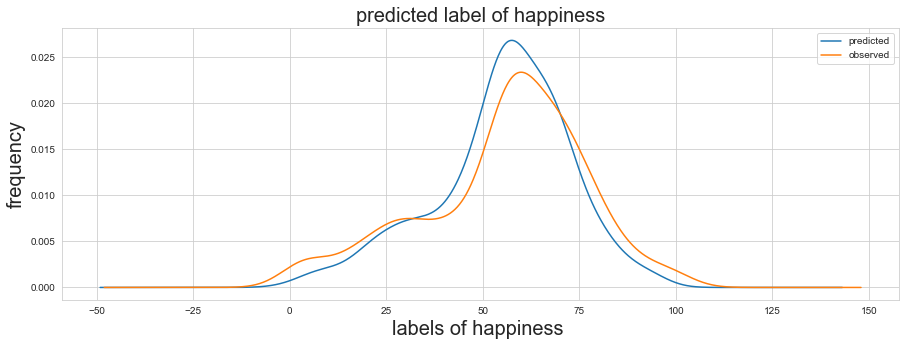

In [26]:
df_pre=DataFrame([y_pre1,y_test],index=["predicted","observed"]).T
df_pre["predicted"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
df_pre["observed"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
plt.title("predicted label of happiness",fontsize=20)
plt.xlabel("labels of happiness ",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.legend(["predicted","observed"])

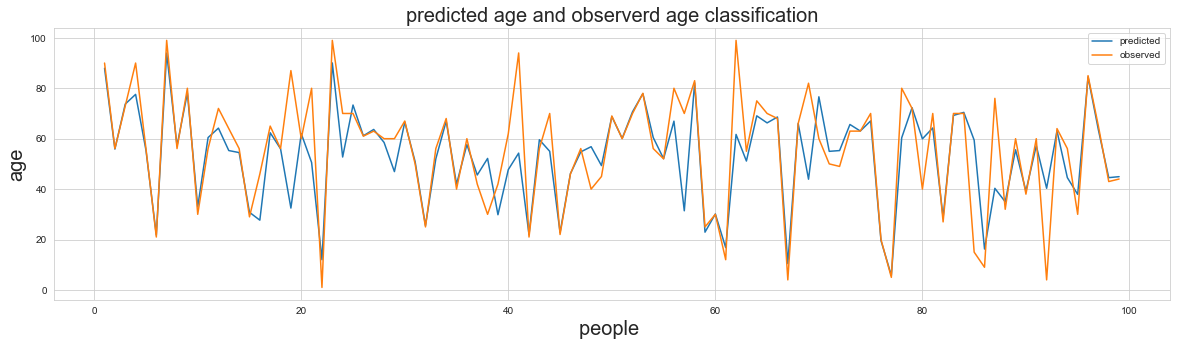

In [27]:
df_pre["predicted"][1:100].plot(figsize=(20,5))
df_pre["observed"][1:100].plot(figsize=(20,5))
plt.title("predicted age and observerd age classification",fontsize=20)
plt.xlabel("people ",fontsize=20)
plt.ylabel("age",fontsize=20)
plt.legend(["predicted","observed"])

In [28]:
(mean_squared_error(y_pre1,y_test))

199.62509038348415

# clinical_life_table

In [21]:
df_c=df2[["month_of_death","year_of_death","age_of_death_above_one_year"]]

In [22]:
df_c["interval"]=np.zeros(len(df_c["month_of_death"]))

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_c.head(2)

,month_of_death,year_of_death,age_of_death_above_one_year,interval
0,0.0,2011.0,51.0,0.0
1,0.0,2011.0,67.0,0.0


In [24]:
mon=np.unique(df_c["month_of_death"])
year=np.unique(df_c["year_of_death"])

In [25]:
df_c1=df_c

In [26]:
s1=1
for i in year:
    for j in mon[1:]:
        indx=inret(i,j)
        df_c=substi(indx,s1)
        s1=s1+1
        #print(s1)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
sum1=[]
for i in np.arange(len(df_c["interval"])):
    if df_c["interval"][i]==0:
        sum1=np.append(sum1,i)

In [29]:
df_c=df_c.drop(sum1)

In [30]:
d=[]
for i in np.arange(1,len(np.unique(df_c["interval"]))+1):
                d=np.append(d,sum(pd.get_dummies(df_c["interval"])[i]))

In [31]:
s=len(df_c["interval"].values)
s

3025

In [32]:
s=len(df_c["interval"].values)
cs=[s]
for i in np.arange(1,49):
    cs1=s-d[i-1]
    cs=np.append(cs,cs1)
    s=cs1

In [33]:
clt=DataFrame([np.arange(1,49),cs,d],index=["age interval","cum_sum","deaths"]).T

In [34]:
qt=clt["deaths"]/clt["cum_sum"]
pt=(np.ones(len(qt))-qt)

In [35]:
clt["qt"]=qt
clt["pt"]=pt

In [36]:
clt["Pt"]=np.ones(len(qt))

In [37]:
for i in np.arange(0,47):
    clt["Pt"][i+1]=(clt["pt"][i]*clt["Pt"][i])

In [38]:
clt=clt.drop(48)

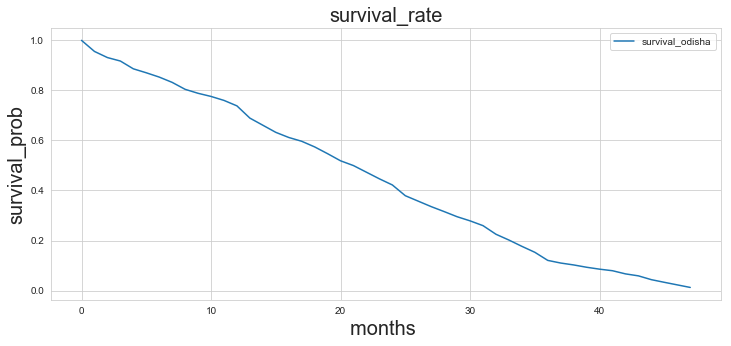

In [89]:
clt["Pt"].plot(figsize=(12,5))
plt.title("survival_rate",fontsize=20)
plt.xlabel("months ",fontsize=20)
plt.ylabel("prob_of_remission",fontsize=20)
plt.legend(["survival_odisha"])

In [39]:
df_p=pd.read_csv("ahs-mort-bihar-patna.csv")

In [40]:
df_cb=df_p[["month_of_death","year_of_death","age_of_death_above_one_year"]]

In [41]:
r0=(np.mean(df1))
r1=r0.index
r2=r0.values
df2=df_cb
df_cb=replacer_mean(df2)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [42]:
mon1=np.unique(df_cb["month_of_death"])
year1=np.unique(df_cb["year_of_death"])

In [43]:
def substi_b(ar,s):
    n=len(ar)
    sum1=0
    for i in np.arange(n):
        j=ar[i]
        df_cb1["interval"][j]=s
        #sum1=sum1+ar[i]
    return(df_c1)
def inret_b(y,m):
    return(np.where((df_cb1["year_of_death"]==y) & (df_cb1["month_of_death"]==m))[0])

In [51]:
df_cb["interval"]=np.zeros(len(df_cb["month_of_death"]))

mon1=np.unique(df_cb["month_of_death"])
year1=np.unique(df_cb["year_of_death"])

df_cb1=df_cb

s1=1
for i in year:
    for j in mon[1:]:
        indx=inret_b(i,j)
        df_cb=substi_b(indx,s1)
        s1=s1+1

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [52]:
sum1=[]
for i in np.arange(len(df_c1["interval"])):
    if df_cb1["interval"][i]==0:
        sum1=np.append(sum1,i)

In [53]:
df_cb1=df_cb1.drop(sum1)

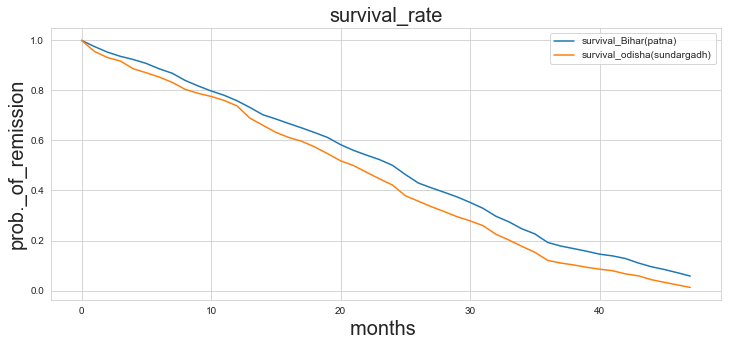

In [54]:
d=[]
for i in np.arange(1,len(np.unique(df_cb1["interval"]))):
                d=np.append(d,sum(pd.get_dummies(df_cb1["interval"])[i]))
s=len(df_cb1["interval"].values)
cs=[s]
for i in np.arange(1,49):
    cs1=s-d[i-1]
    cs=np.append(cs,cs1)
    s=cs1

clt_b=DataFrame([np.arange(1,49),cs,d],index=["age interval","cum_sum","deaths"]).T

qt_b=clt_b["deaths"]/clt_b["cum_sum"]
pt_b=(np.ones(len(qt_b))-qt_b)

clt_b["qt"]=qt_b
clt_b["pt"]=pt_b

clt_b["Pt"]=np.ones(len(qt_b))

for i in np.arange(0,47):
    clt_b["Pt"][i+1]=(clt_b["pt"][i]*clt_b["Pt"][i])

clt_b=clt_b.drop(48)

clt_b["Pt"].plot(figsize=(12,5))
clt["Pt"].plot(figsize=(12,5))
plt.title("survival_rate",fontsize=20)
plt.xlabel("months ",fontsize=20)
plt.ylabel("prob._of_remission",fontsize=20)
plt.legend(["survival_Bihar(patna)","survival_odisha(sundargadh)"])

In [56]:
clt_ob=clt_b
clt_ob["o"]=clt["Pt"].values
clt_ob.head(2)

,age interval,cum_sum,deaths,qt,pt,Pt,o
0,1.0,2741.0,68.0,0.024808,0.975192,1.000000,1.000000
1,2.0,2673.0,61.0,0.022821,0.977179,0.975192,0.955702


# EDA

In [249]:
#univariate_analysis

In [41]:
df1.columns

Index(['rural', 'stratum_code', 'deceased_sex', 'treatment_source',
       'place_of_death', 'member_identity', 'social_group_code',
       'marital_status', 'year_of_marriage', 'highest_qualification',
       'occupation_status', 'disability_status', 'chew', 'smoke', 'alcohol',
       'house_structure', 'drinking_water_source',
       'household_have_electricity', 'lighting_source', 'cooking_fuel',
       'no_of_dwelling_rooms'],
      dtype='object')

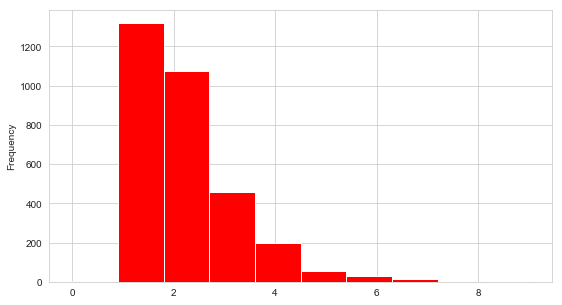

In [42]:
df1["no_of_dwelling_rooms"].plot(kind="hist",figsize=(9,5),color="red")

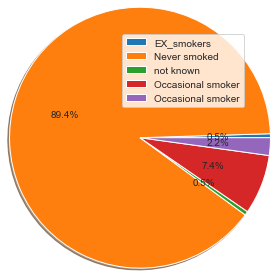

In [43]:
g=[sum(pd.get_dummies(df["smoke"])["Ex - Smoker"]),sum(pd.get_dummies(df["smoke"])["Never smoked"]),sum(pd.get_dummies(df["smoke"])["Not known"]),
                                          sum(pd.get_dummies(df["smoke"])["Occasional smoker"]),
                                          sum(pd.get_dummies(df["smoke"])["Usual smoker"])]
labels=["EX_smokers","Never smoked","not known","Occasional smoker","Occasional smoker"]
pie=plt.pie(g,radius=1.5,shadow=True,autopct='%1.1f%%')
plt.legend(pie[0], labels, loc="best")

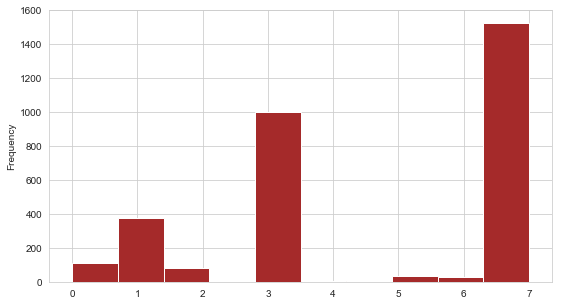

In [44]:
df1["chew"].plot(kind="hist",figsize=(9,5),color="brown")

In [57]:
df_anova=(pd.get_dummies(df["chew"]))

In [58]:
#anova

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ol

In [60]:
from statsmodels.formula.api import ols

In [61]:
df2.columns

Index(['month_of_death', 'year_of_death', 'age_of_death_above_one_year',
       'interval'],
      dtype='object')

In [62]:
lm=ols(" age_of_death_above_one_year ~ chew",data=df).fit()

In [63]:
table=sm.stats.anova_lm(lm)

In [64]:
print(table)

              df        sum_sq      mean_sq         F    PR(>F)
chew         7.0  7.514543e+03  1073.506153  2.108361  0.039596
Residual  2680.0  1.364565e+06   509.166122       NaN       NaN


In [95]:
lm=ols(" age_of_death_above_one_year ~ smoke",data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq     mean_sq         F    PR(>F)
smoke        4.0  1.628744e+03  407.186006  0.797168  0.526877
Residual  2683.0  1.370451e+06  510.790535       NaN       NaN


In [96]:
lm=ols(" age_of_death_above_one_year ~ cooking_fuel",data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

                  df        sum_sq      mean_sq         F   PR(>F)
cooking_fuel     7.0  1.709065e+04  2441.520859  4.836792  0.00002
Residual      2686.0  1.355842e+06   504.781068       NaN      NaN


In [97]:
lm=ols(" age_of_death_above_one_year ~ alcohol",data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F   PR(>F)
alcohol      4.0  1.446288e+04  3615.720707  7.145594  0.00001
Residual  2683.0  1.357617e+06   506.007032       NaN      NaN


In [99]:
lm=ols(" age_of_death_above_one_year ~ social_group_code",data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

                       df        sum_sq       mean_sq          F        PR(>F)
social_group_code     2.0  2.345442e+04  11727.209987  23.415268  8.261362e-11
Residual           2732.0  1.368284e+06    500.836025        NaN           NaN


In [74]:
#df1["smoke"]
df2=df1

In [78]:
ty=np.unique(df2["smoke"])


In [104]:
ty=np.unique(df2["smoke"])
ex_smoker=[]
never_smoke=[]
not_known=[]
occ_smoker=[]
usual_smoker=[]
for j in np.arange(len(df1["smoke"])):
    if int(ty[0])==int(df2["smoke"][j]):
        ex_smoker=np.append(ex_smoker,y[j])
    if int(ty[1])==int(df2["smoke"][j]):
        never_smoke=np.append(never_smoke,y[j])
    if int(ty[2])==int(df2["smoke"][j]):
        not_known=np.append(not_known,y[j])
    if int(ty[3])==int(df2["smoke"][j]):
        occ_smoker=np.append(occ_smoker,y[j])
    if int(ty[4])==int(df2["smoke"][j]):
        usual_smoker=np.append(usual_smoker,y[j])

In [106]:
stats.ttest_ind(usual_smoker,never_smoke,equal_var=False)

Ttest_indResult(statistic=-0.7537677950768323, pvalue=0.45356962152582736)

In [108]:
[np.mean(usual_smoker),np.mean(never_smoke)]

[54.05312979242716, 56.2568731718954]

so smoking effects the life expectency of human significantly
#on an average it reduces the life time to two years

In [109]:
stats.ttest_ind(ex_smoker,occ_smoker,equal_var=False)

Ttest_indResult(statistic=0.9607320774659659, pvalue=0.3375891400306469)